In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import tree

In [119]:
data = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/Cheat.csv',sep=';')
data.head()

,Refund,Marital Status,Income,Cheat
0,Yes,Single,125,No
1,No,Married,100,No
2,NO,Single,70,No
3,Yes,Married,120,No
4,No,Divorce,95,Yes


In [120]:
data.tail()

,Refund,Marital Status,Income,Cheat
5,No,Married,60,No
6,Yes,Divorce,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [136]:
data['Marital Status'][9] = 0
data['Marital Status'][6] = 2
data['Marital Status'][6-2] = 4
data['Marital Status'][6-3] = 1


In [122]:
data['Refund'][2] = 'No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Refund          10 non-null     object
 1   Marital Status  10 non-null     object
 2   Income          10 non-null     int64 
 3   Cheat           10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [124]:
data['Refund'],_ =pd.factorize(data['Refund'])
data['Marital Status'],_ =pd.factorize(data['Marital Status'])
data['Cheat'],_ =pd.factorize(data['Cheat'])

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

In [137]:
dtc = DecisionTreeClassifier(criterion='gini')
x_train,x_test,y_train,y_test = tts(data.drop(columns=['Cheat'],inplace=False),data['Cheat'],train_size=0.80,random_state=2)

In [140]:
tre=dtc.fit(x_train,y_train)

In [139]:
print(x_train,'\n',y_train)

   Refund  Marital Status  Income
5       1               1      60
0       0               0     125
7       1               0      85
2       1               0      70
3       0               1     120
6       0               2     220
9       1               0      90
8       1               1      75 
 5    0
0    0
7    1
2    0
3    0
6    0
9    1
8    0
Name: Cheat, dtype: int64


In [129]:
_

Index(['No', 'Yes'], dtype='object')

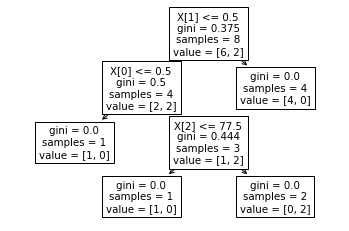

In [141]:
tree.plot_tree(tre)
plt.show()